In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 
import pickle

In [2]:
df1 = pd.read_csv("Reviews.csv")

In [3]:
df1.shape

(568454, 10)

In [4]:
df1=df1.head(100000)

In [5]:
df1.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [6]:
df1.dropna(subset=['Summary'],inplace=True)

In [7]:
df1['text_summary']=df1['Summary']+" "+df1['Text']

In [8]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...


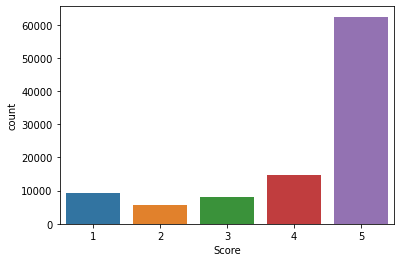

In [9]:
import seaborn as sns
sns.countplot(df1["Score"])

In [10]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...


In [11]:
df1.shape

(99998, 11)

In [12]:
len(df1.ProfileName.unique())

63451

In [13]:
df1.groupby(['ProfileName']).filter(lambda x: len(x) >= 3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_summary
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Yay Barley Right now I'm mostly just sprouting...
13,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,1288915200,fresh and greasy!,good flavor! these came securely packed... the...,fresh and greasy! good flavor! these came secu...
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Strawberry Twizzlers - Yummy The Strawberry Tw...
17,18,B001GVISJM,AFKW14U97Z6QO,Becca,0,0,5,1345075200,Love it!,I am very satisfied with my Twizzler purchase....,Love it! I am very satisfied with my Twizzler ...
...,...,...,...,...,...,...,...,...,...,...,...
99976,99977,B000LQORDE,A1CVEGNOQ62A25,Edward,1,3,5,1288569600,Spicy,I was browsing amazon when I came across these...,Spicy I was browsing amazon when I came across...
99984,99985,B000LQORDE,A1YVCGV8G16OMM,Nathan,1,3,5,1239148800,"To steal a tagline...mmm, mmm good!",This stuff is awesome! It has the right amount...,"To steal a tagline...mmm, mmm good! This stuff..."
99985,99986,B000LQORDE,A1BN8134NN8IAC,"Jorge A. Zuniga ""CerealLOVER""",1,3,5,1239062400,nong shim,Just about any nong shim soup is good. Most of...,nong shim Just about any nong shim soup is goo...
99986,99987,B000LQORDE,A30Z0GG96D11EO,"Sofia Hernandez ""Shut up B*&#$!""",1,3,5,1236124800,Yummy al dente noodles in my bowl!,I bought these on a whim because they were a d...,Yummy al dente noodles in my bowl! I bought th...


In [14]:
df1=df1.drop_duplicates(subset=['Summary','Text'], keep='last')

In [15]:
print(df1.shape)
df1.head()


(88563, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...


In [16]:
df1.loc[df1['HelpfulnessNumerator']>df1['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_summary
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,Pure cocoa taste with crunchy almonds inside I...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,Bought This for My Son at College My son loves...


In [17]:
df1 = df1.loc[~ (df1['HelpfulnessNumerator']>df1['HelpfulnessDenominator'])]

In [18]:
print(df1.shape)
df1=df1.loc[~(df1["Score"]==3)]

(88561, 11)


In [19]:
def fun(score):
    if int(score) <3:
        return 0
    else:
        return 1

In [20]:
df1['Score'] = df1['Score'].map(lambda x: fun(x))

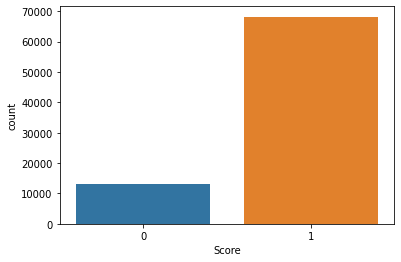

In [21]:
sns.countplot(df1['Score'])

In [22]:
import re
from bs4 import BeautifulSoup
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
# words="abcd2 23ab abcd"
# re.sub(r'\w*\d\w*', '', words).strip()#alpha numeric

In [24]:
import nltk
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [25]:
processed_text = []
for sentance in df1['text_summary'].values:
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, "html.parser").get_text()
    sentance = decontracted(sentance)
    sentance=re.sub(r'\w*\d\w*', '', sentance).strip()#alpha numeric
#     sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(word.lower() for word in sentance.split() if word.lower() not in stopwords)
    processed_text.append(sentance.strip())

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=8)
tf_idf_vect.fit(processed_text)
X = tf_idf_vect.transform(processed_text )
Y=df1['Score']

In [27]:
joblib_file = "transform.pkl" 
pickle.dump(tf_idf_vect, open(joblib_file, 'wb'))

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
# import gensim 
# from gensim.models import Word2Vec
# w2v_doc=[sub.split() for sub in processed_text]
# w2v = gensim.models.Word2Vec(w2v_doc, min_count = 2,  
#                               size = 150, window = 5)

In [30]:
# words = list(w2v.wv.vocab)
# len(words) 
# vec=(w2v.wv.syn0)

In [31]:
# def document_vector(doc):
#     """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
#     doc = [word for word in doc if word in w2v.wv.vocab]
#     if len(doc)>1:
#         return np.mean(w2v[doc], axis=0)
#     else:
#         return(np.zeros(150))

In [32]:
# df1['doc_vector'] = list(map(document_vector,w2v_doc))
# X=list(df1['doc_vector'])
# Y=df1['Score']

In [33]:
# final_tf_idf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,solver='lbfgs',C=10,class_weight="balanced")
# model = GridSearchCV(LogisticRegression(solver ='saga'), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train,y_train)
# print(model.best_estimator_)


LogisticRegression(C=10, class_weight='balanced', random_state=0)

In [34]:
# tuned_parameters = {'C': [10**-4, 10**-2, 10**0,10**1, 10**2, 10**4],'solver' :['saga' ,'newton-cg', 'lbfgs', 'liblinear']}
# model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5,n_jobs=-1,verbose=4)
# model.fit(X_train,y_train)
# print(model.best_estimator_)

In [35]:
# lr=model.best_estimator_
# lr.fit(X_train,y_train)

In [36]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9364474492931776

In [37]:
joblib_file = "model.pkl"  
pickle.dump(model, open(joblib_file, 'wb'))

In [38]:
# plt.xlabel("actual")
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')
# plt.show()

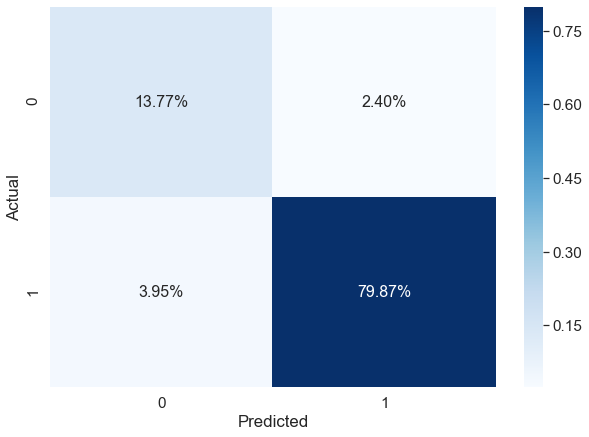

In [39]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
data = (data/np.sum(data))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%',annot_kws={"size": 16})
plt.show()